In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# import warnings
# warnings.filterwarnings("ignore")
# from pylab import rcParams

%matplotlib inline

# Exploratory Analysis

In [3]:
# Loading dataset and viewing a clip of the data
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Get Data Insight

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# check for null values in the data
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# # Data to plot
# sizes = data['Churn'].value_counts(sort = True)
# colors = ["grey","purple"] 
# labels = ["No", "Yes"]
# explode = (0, 0.1)
# rcParams['figure.figsize'] = 5,5
# # Plot
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=270,)
# plt.title('Percentage of Churn in Dataset')
# plt.show()

In [7]:
# get a statistical insight of the data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Preprocessing

In [8]:
data = data.dropna(how='all') # remove samples with all missing values
data = data[~data.duplicated()] # remove duplicates

In [9]:
# There are 11 samples that have TotalCharges set to ' ', which seems like a mistake in the data. Removing those records and making TotalCharges as numeric 
total_charges_filter = data.TotalCharges == " "
data = data[~total_charges_filter]
data.TotalCharges = pd.to_numeric(data.TotalCharges)

In [10]:
# Dropping irrelevant data
data.drop(['customerID'], axis=1, inplace=True)

## Data Visualization

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


### Get distribution of different features in the data

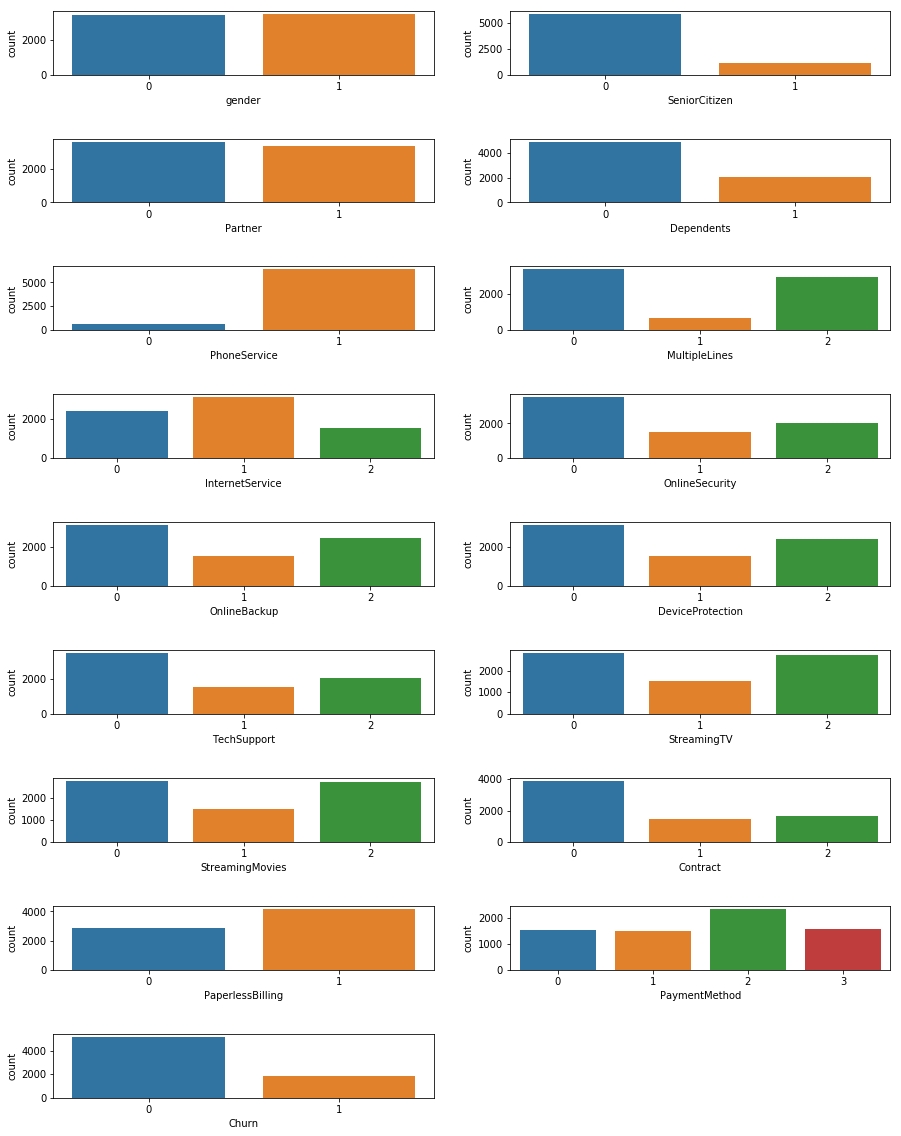

In [39]:
# distribution of different features in the data wrt feature 'left'
features=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(9, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=data)
#     plt.xticks(rotation=90)
#     plt.title("No. of customers")

### Get distribution of different features in the data wrt feature 'Churn'

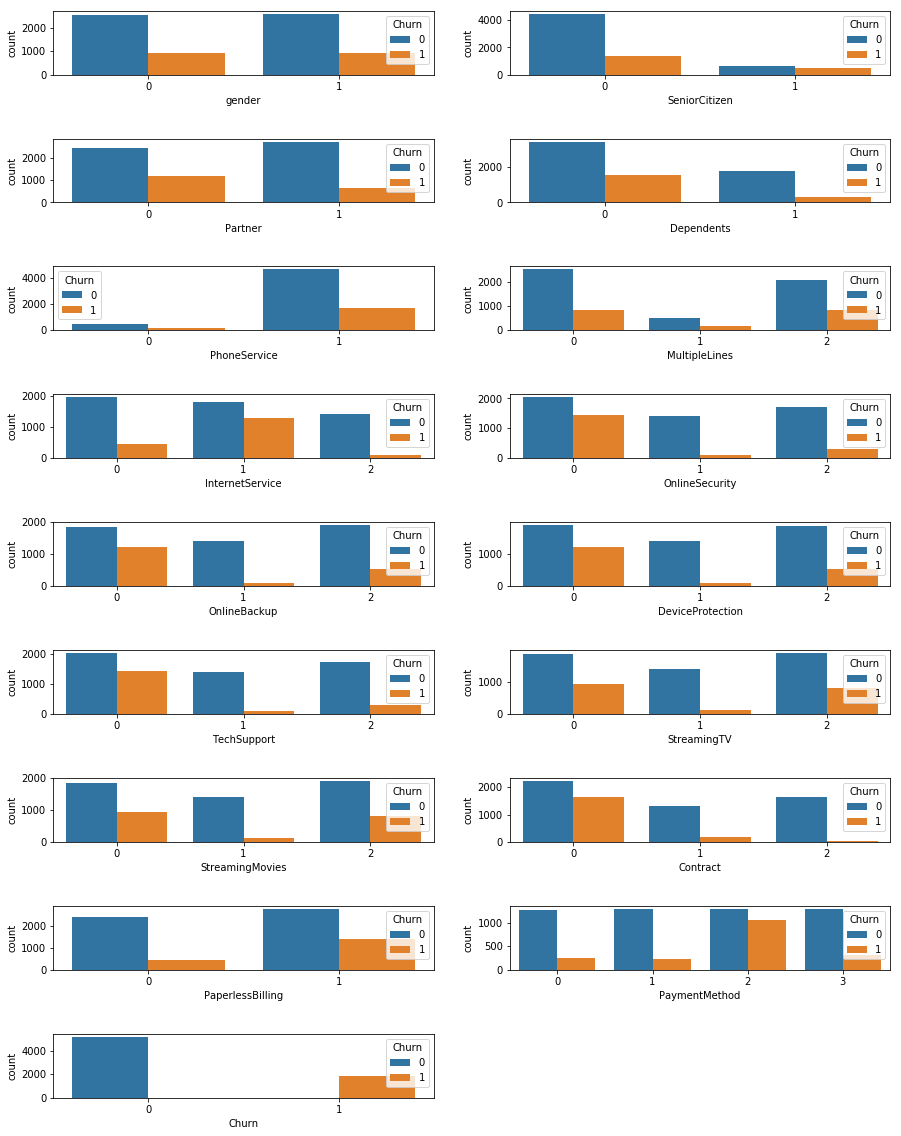

In [40]:
# distribution of different features in the data wrt feature 'left'
features=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(9, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=data, hue='Churn')
#     plt.xticks(rotation=90)
#     plt.title("No. of customers")

# Building a Prediction Model

## Pre-Processing Data

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.4+ MB


In [18]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['gender']=le.fit_transform(data['gender'])
data['SeniorCitizen']=le.fit_transform(data['SeniorCitizen'])
data['Partner']=le.fit_transform(data['Partner'])
data['Dependents']=le.fit_transform(data['Dependents'])
data['PhoneService']=le.fit_transform(data['PhoneService'])
data['MultipleLines']=le.fit_transform(data['MultipleLines'])
data['InternetService']=le.fit_transform(data['InternetService'])
data['OnlineSecurity']=le.fit_transform(data['OnlineSecurity'])
data['OnlineBackup']=le.fit_transform(data['OnlineBackup'])
data['DeviceProtection']=le.fit_transform(data['DeviceProtection'])
data['TechSupport']=le.fit_transform(data['TechSupport'])
data['StreamingTV']=le.fit_transform(data['StreamingTV'])
data['StreamingMovies']=le.fit_transform(data['StreamingMovies'])
data['Contract']=le.fit_transform(data['Contract'])
data['PaperlessBilling']=le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod']=le.fit_transform(data['PaymentMethod'])
data['Churn']=le.fit_transform(data['Churn'])

In [20]:
# data after converting categorical features to integer features
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Split Train and Test Set

In [21]:
#Spliting data into Feature and
X=data.loc[:, data.columns != 'Churn']
y=data['Churn']

In [24]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 70% training and 30% test

## Model Building

### Traditional ML algorith 

In [35]:
#Create Classifier
model = LogisticRegression()
# model = GradientBoostingClassifier()

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

D:\programs\Continuum\miniconda3\envs\py35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Evaluating Model Performance

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
# Classification report
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.7882018479033405
Precision: 0.6292517006802721
Recall: 0.4946524064171123
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [37]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

SeniorCitizen       0.296805
PaperlessBilling    0.284506
InternetService     0.175281
Partner             0.107420
MultipleLines       0.069392
StreamingTV         0.030363
PaymentMethod       0.030207
StreamingMovies     0.029830
MonthlyCharges      0.021637
TotalCharges        0.000322
gender             -0.035423
tenure             -0.060618
DeviceProtection   -0.063257
OnlineBackup       -0.127074
Dependents         -0.241852
TechSupport        -0.263399
OnlineSecurity     -0.292183
Contract           -0.790120
PhoneService       -0.918159
dtype: float64

## Analysis of the results

It can be observed that some variables have a positive relation to our predicted variable and some have a negative relation. A positive value has a positive impact on our predicted variable. Some good examples are "SeniorCitizen" and "PaperlessBilling". On the other hand that "Contract" and "PhoneService" are in highly negative relation to the predicted variable.